In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('headbrain.csv')
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [3]:
X = X.reshape((X.shape[0],1))
y = y.reshape((y.shape[0],1))

In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


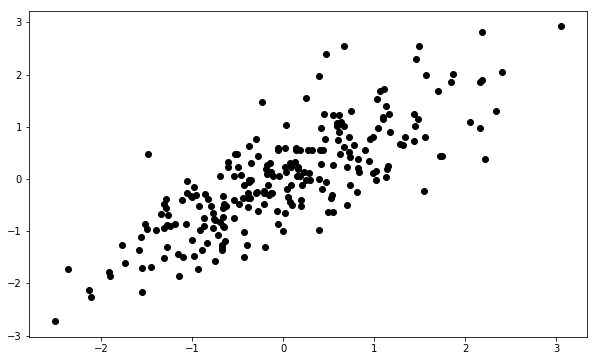

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color='black')

In [63]:
def gradient(epochs,alpha):
    slope = 0
    intercept = 0
    n = len(X)
    for i in range(epochs):
        y_pred = slope * X + intercept
        loss = y_pred - y
#         gradSlope = (2/n) * loss.T.dot(X)
#         gradIntercept = (2/n) * np.sum(loss)
        gradSlope = (1/n) * loss.T.dot(X)
        gradIntercept = (1/n) * np.sum(loss)
        slope = slope - alpha * gradSlope
        intercept = intercept - alpha * gradIntercept
    
    return slope, intercept

In [64]:
slope,intercept = gradient(epochs=50000,alpha=0.0003)

In [65]:
slope

array([[0.79956947]])

In [66]:
intercept

-3.3306241028174265e-16

In [67]:
predictions = []
for i in range(len(X)):
    y_pred = slope[0][0] * X[i] + intercept
    predictions.append(y_pred)

In [68]:
mean_absolute_error(y,predictions)

0.469389464197339